In [1]:
# go wide screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Next two lines force automatic reload of loaded module. Convenient if
# one is still fiddeling with them.
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
% matplotlib notebook

In [48]:
from astropy.io import ascii
from scipy.interpolate import interp1d
import os

In [4]:
import matplotlib
from matplotlib import cm

In [5]:
# stolen from 
# https://terbium.io/2017/12/matplotlib-3d/
def normalize(arr):
    arr_min = np.min(arr)
    return (arr-arr_min)/(np.max(arr)-arr_min)

def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded

def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z

# 3D routines

# Lyman Alpha Flimanent, COSMOSC IFU 052, 

<IPython.core.display.Javascript object>


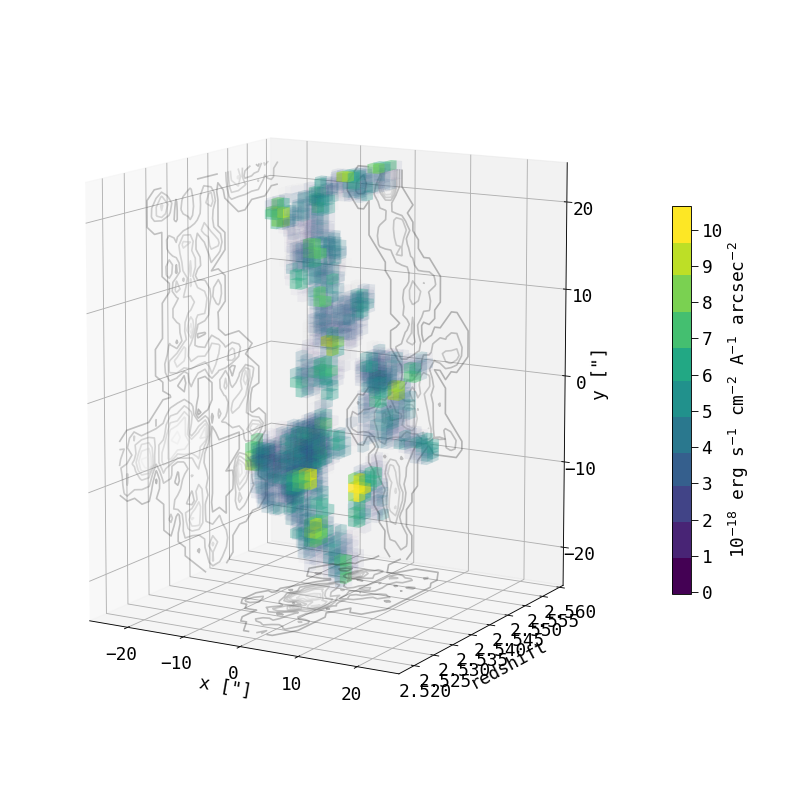

In [31]:
field = 'COSMOSC'
ifu = '025'
Apix = 0.5**2.
ID = 10018


mk3dplot(field, ifu, ID)

In [188]:
plt.savefig("/Users/mxhf/ownCloudRZG/work/MPE/hetdex/src/deep_and_repeat/COSMOS/paper/figures/filaments/HD-FIL1_3D_6.pdf")

In [209]:
print( "Extend in wl space: {:.1f}A -- {:.1f}A - {:.1f}A.".format( ww[zmin], ww[zmax], ww[zmax]-ww[zmin]) )

Extend in wl space: 4279.1A -- 4326.8A - 47.7A.


In [211]:
from scipy.interpolate import interp1d
wlinterp = interp1d(np.arange(len(ww)), ww , 1)
imean = np.sum(Z[jj] * cfilter[jj])/np.sum(cfilter[jj]) 

print("The luminosity weighted mean wavelength is {:.1f}A (z = {:.3f})".format(wlinterp(imean) , wlinterp(imean)/1216. - 1.))

The luminosity weighted mean wavelength is 4301.1A (z = 2.537)


In [205]:
wlinterp(405.7085828343313)

array(4300.41225099)

# HD-LAB1

<IPython.core.display.Javascript object>


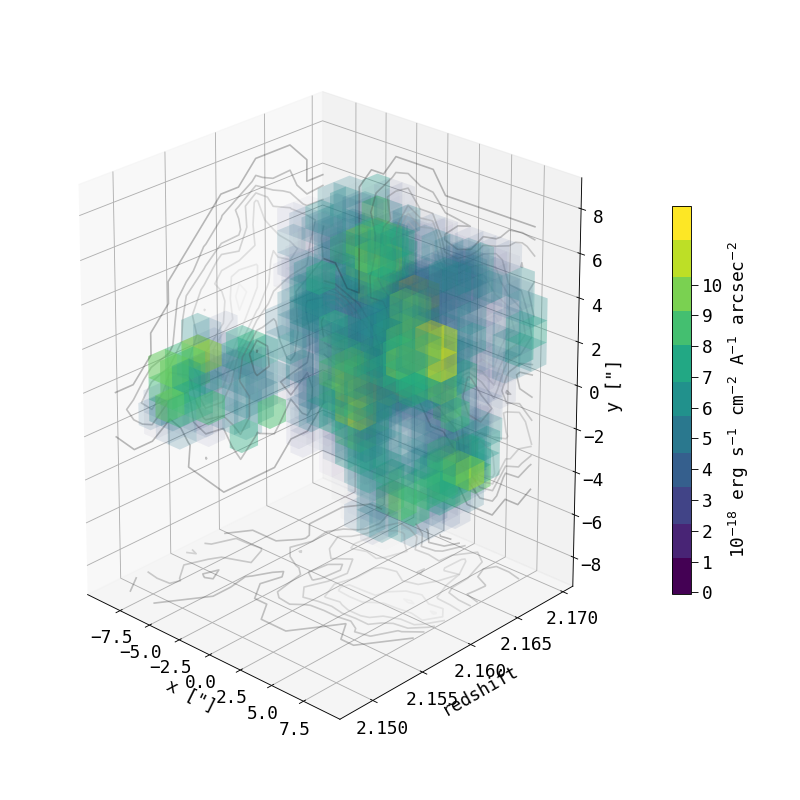

In [28]:
field = 'COSMOSA'
ifu = '022'
Apix = 0.5**2.
ID = 5001


mk3dplot(field, ifu, ID)


# COSMOSC 021 5009

<IPython.core.display.Javascript object>


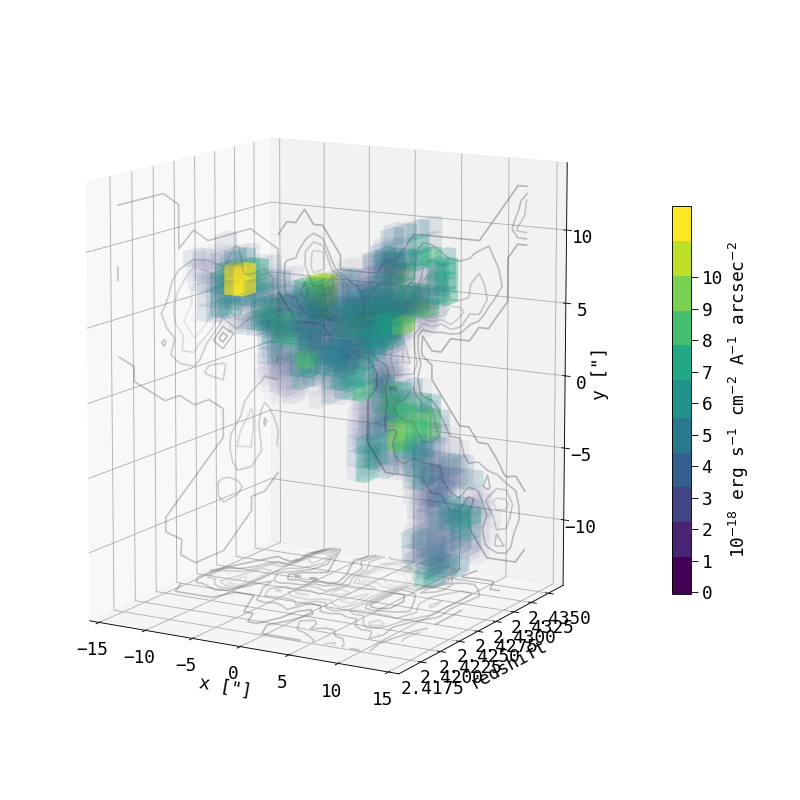

Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "/Users/mxhf/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipywidgets/widgets/widget.py", line 419, in __del__
    self.close()
  File "/Users/mxhf/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipywidgets/widgets/widget.py", line 467, in close
    if self.comm is not None:
  File "/Users/mxhf/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/traitlets/traitlets.py", line 554, in __get__
    return self.get(obj, cls)
  File "/Users/mxhf/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/traitlets/traitlets.py", line 529, in get
    dynamic_default = self._dynamic_default_callable(obj)
  File "/Users/mxhf/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/traitlets/traitlets.py", line 501, in _dynamic_default_callable
    for cls in mro[:mro.index(self.this_class) + 1]:
ValueError: <class 'ipywidgets.widgets.widget.Widget'> is not in list


In [37]:
import spectrum
field = 'COSMOSC'
ifu = '021'
Apix = 0.5**2.
ID = 5009


mk3dplot(field, ifu, ID)


# COSMOSC 042 5026

<IPython.core.display.Javascript object>


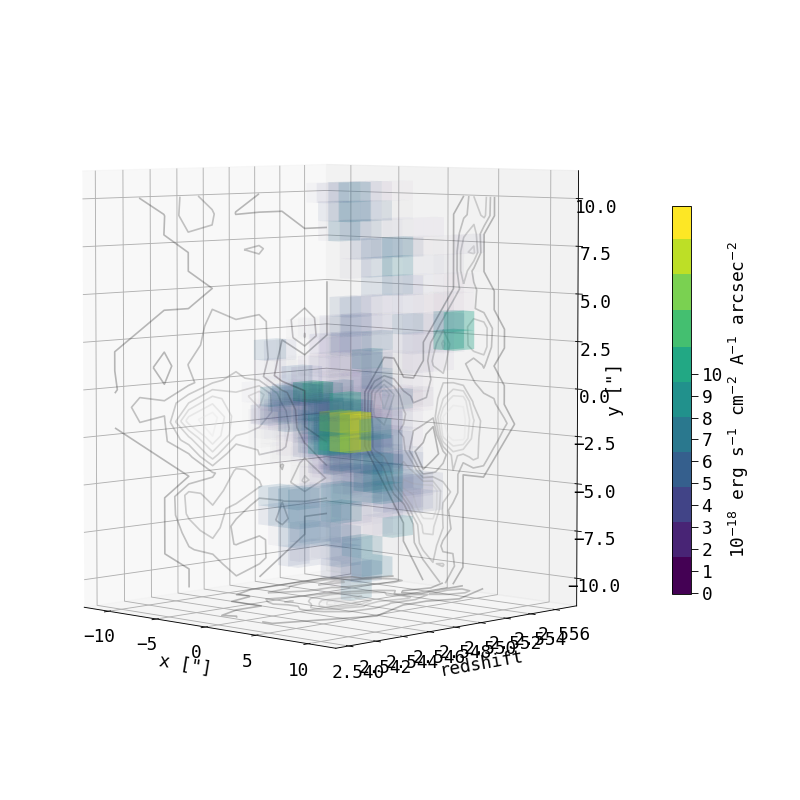

In [43]:
import spectrum
field = 'COSMOSC'
ifu = '042'
Apix = 0.5**2.
ID = 5026


mk3dplot(field, ifu, ID)


# COSMOSC 042 5036

<IPython.core.display.Javascript object>


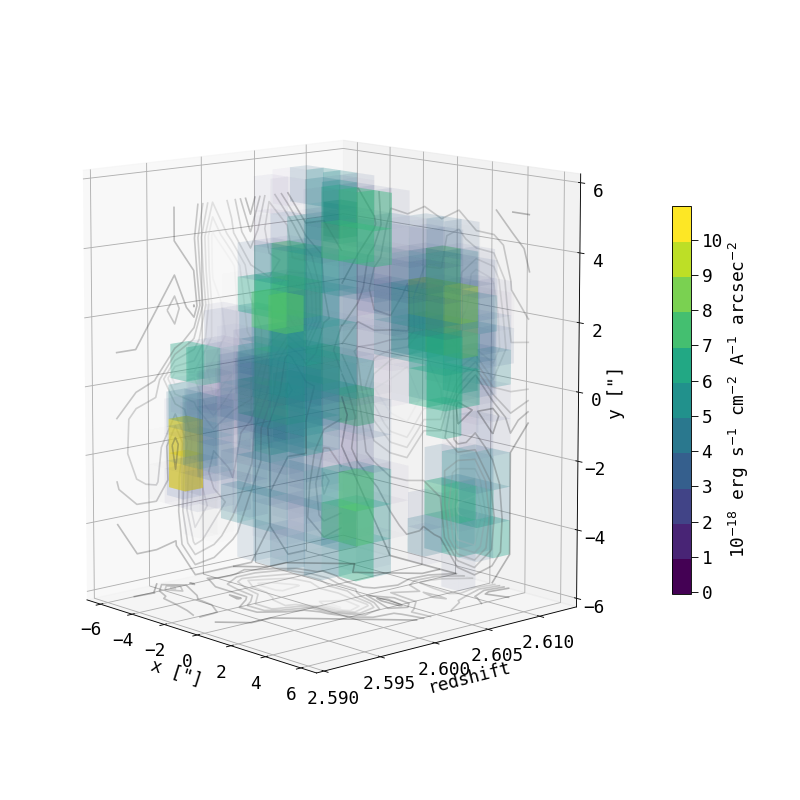

In [44]:
import spectrum
field = 'COSMOSC'
ifu = '042'
Apix = 0.5**2.
ID = 5036


mk3dplot(field, ifu, ID)


Segmentation map ../data/mmap_COSMOSD_025.fits.gz does not exist. Falling back to ../data/map_COSMOSD_025.fits.gz.
4892


<IPython.core.display.Javascript object>


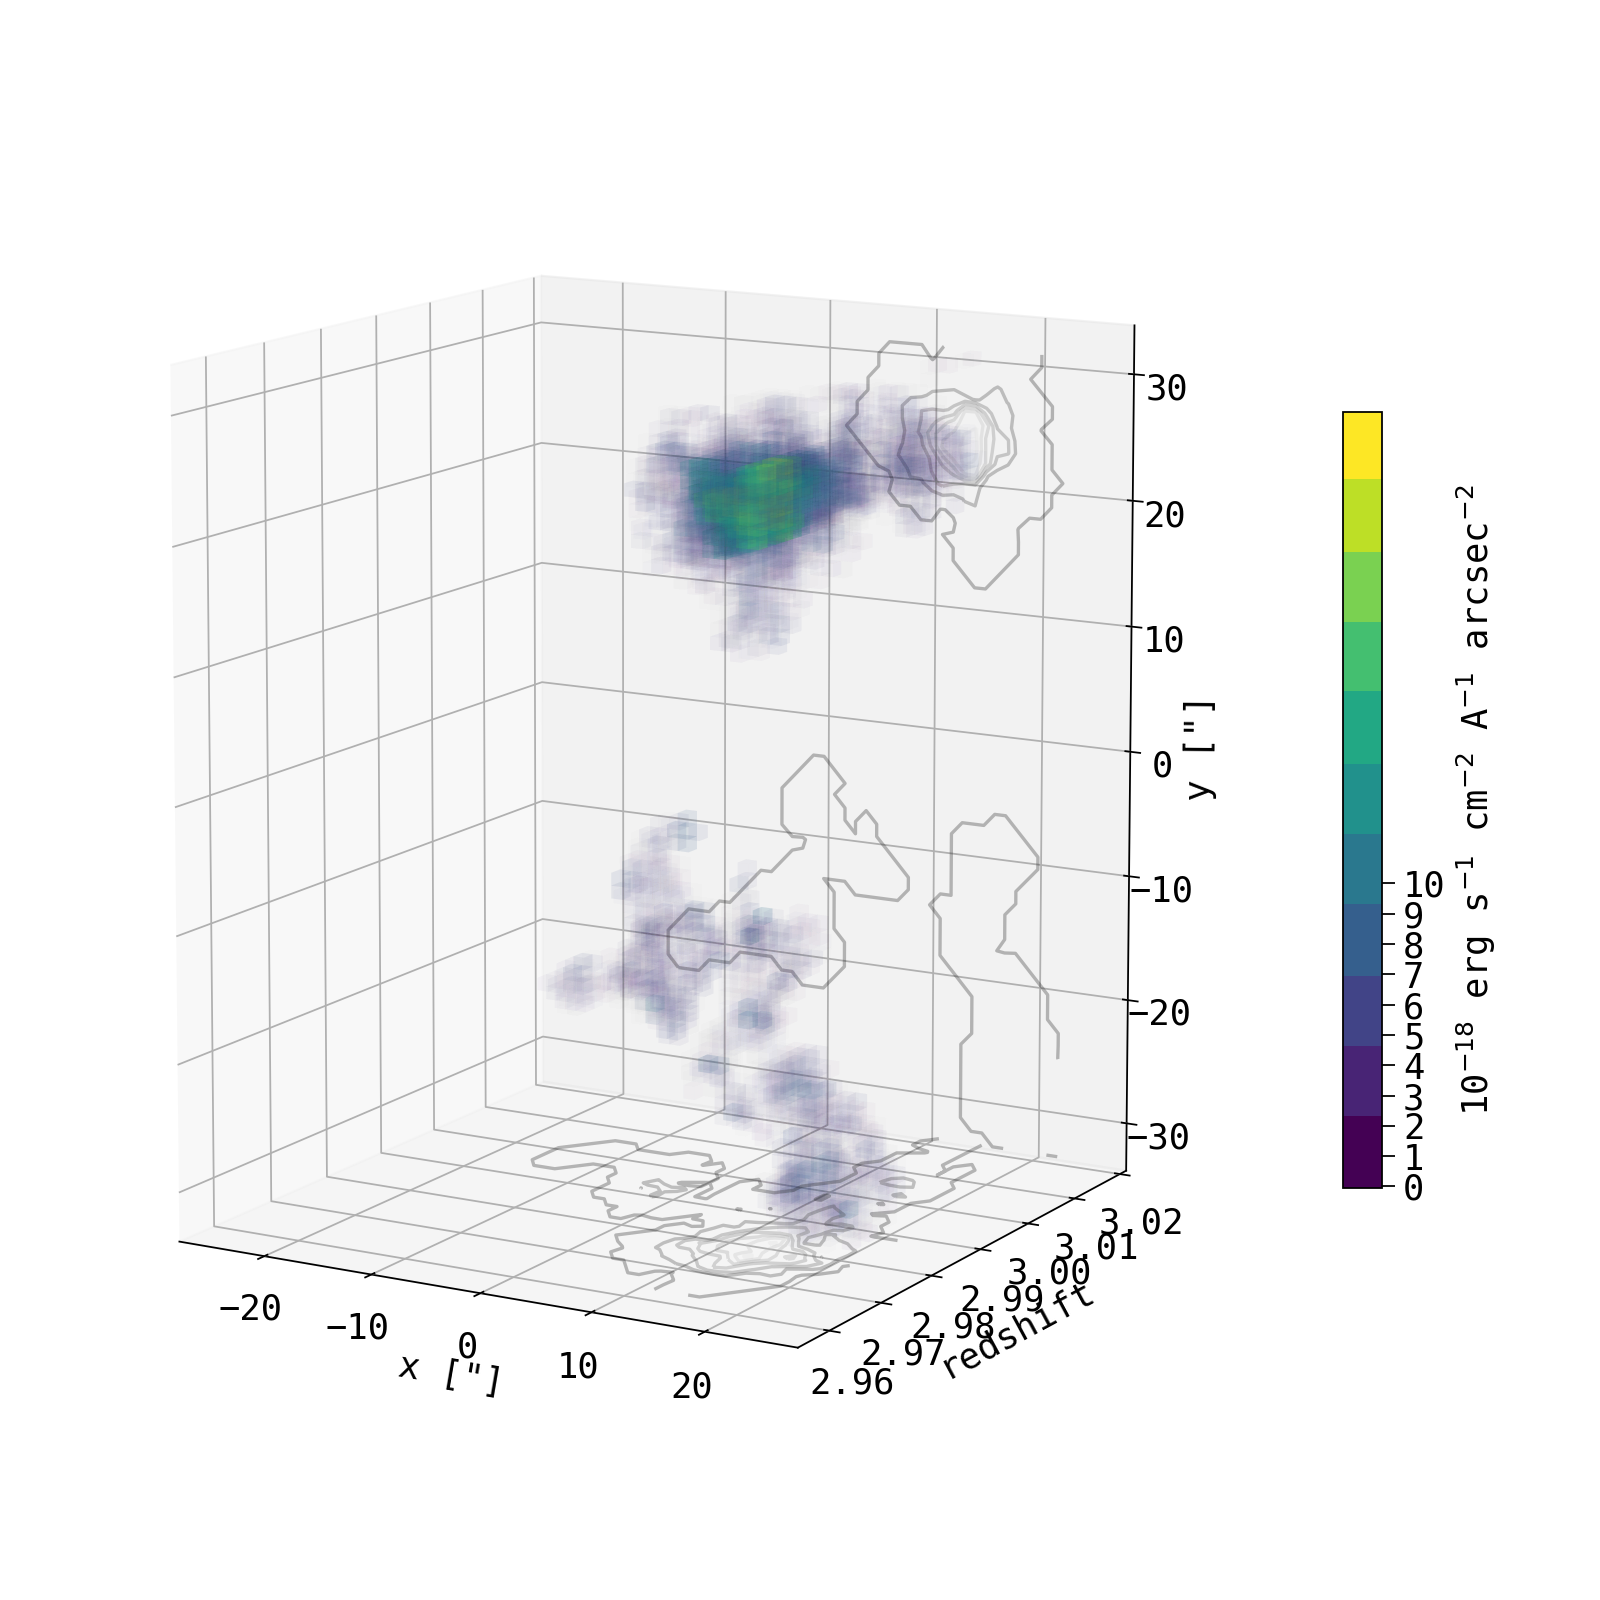

np.sum(s,axis=2).shape , sZ[:,0,:].shape, sY[:,:,0].shape:  (36, 65) (36, 49) (36, 65)


In [90]:
import spectrum
field = 'COSMOSD'
ifu = '025'
Apix = 0.5**2.
ID = [44, 45]
ID = [46]
ID = [44, 45, 46]


mk3dplot(field, ifu, ID)

In [83]:
%pdb

Automatic pdb calling has been turned OFF


In [88]:
import spectrum


def mk3dplot(field, ifu, ID):
    fncube = "../data/outcube_{}_{}.fits.gz".format(field, ifu)
    fnmap  = "../data/mmap_{}_{}.fits.gz".format(field, ifu)
    fnmap2  = "../data/map_{}_{}.fits.gz".format(field, ifu)
    fncal = "../specphot/mean_cal_{}.txt".format(field)


    tcal = ascii.read(fncal, format="fixed_width")
    cal_interp = interp1d(tcal["wl[A]"], tcal["cal[erg/s/cm^2/A/cnt]"], kind='cubic', bounds_error=False)


    c = spectrum.readSpectrum(fncube)
    ww = c.grid()
    
    if os.path.exists(fnmap):
        m = spectrum.readSpectrum(fnmap)
    else:
        print("Segmentation map {} does not exist. Falling back to {}.".format(fnmap, fnmap2))
        m = spectrum.readSpectrum(fnmap2)

    # apply flux calibration
    for i,w in enumerate(ww):
        c.data[i] = c.data[i] * cal_interp(w)/Apix * 1e18


    xx,yy,zz = np.arange(c.data.shape[2]), np.arange(c.data.shape[1]), np.arange(c.data.shape[0])
    Z,Y,X = np.meshgrid(zz,yy,xx,indexing='ij')


    if np.ndim(ID) == 0.:
        jj =  m.data == ID 
    else:
        jj = np.zeros_like( m.data,dtype=bool)
        for i in ID:
            jj += m.data == i 
    print(np.sum(jj))
            
    
    
    cfilter = np.zeros_like(c.data)
    cfilter[jj] = c.data[jj]

    xx = X[jj].flatten()
    yy = Y[jj].flatten()
    zz = Z[jj].flatten()
    cc = c.data[jj].flatten()

    dmax = np.max(cc)

    cc = cc/dmax
    cc[cc<0.] = 0.


    _xmin,_xmax = np.min( X[jj]), np.max(X[jj])
    _ymin,_ymax = np.min( Y[jj]), np.max(Y[jj])
    zmin,zmax = np.min( Z[jj]), np.max(Z[jj])

    redshift_min, redshift_max = ww[int(zmin)]/1216.-1., ww[int(zmax)]/1216.-1.


    # make x and y size the same
    sy = _ymax-_ymin
    sx = _xmax-_xmin
    sxy = np.max([sx,sy])
    #sxy=10

    xmin,xmax = max( int( (_xmax+_xmin)/2.-sxy/2.), 0), min( int( (_xmax+_xmin)/2.+sxy/2.), _xmax)
    ymin,ymax = max( int( (_ymax+_ymin)/2.-sxy/2.), 0), min( int( (_ymax+_ymin)/2.+sxy/2.), _ymax)


    s = cfilter[zmin:zmax, ymin:ymax, xmin:xmax] * 10
    sX = X[zmin:zmax, ymin:ymax, xmin:xmax] 
    sY = Y[zmin:zmax, ymin:ymax, xmin:xmax] 
    sZ = Z[zmin:zmax, ymin:ymax, xmin:xmax]
    
    

    sX = sX - (xmax + xmin)/2.
    sY = sY - (ymax + ymin)/2.
    sZ = (sZ - np.min(sZ))/(np.max(sZ) - np.min(sZ)) * (ww[int(zmax)]/1216. - ww[int(zmin)]/1216.) + (ww[int(zmin)]/1216.-1.)

    #(ww[int(zmax)]/1216. - ww[int(zmin)]/1216.) + ww[int(zmin)]/1216.-1.

    cube = s.swapaxes(0,1).swapaxes(0,2)

    ###

    cube = cube/np.max(cube)
    cube[cube<0.] = 0.
    
    
    ####### plotting
    
    facecolors = cm.viridis(cube)
    facecolors[:,:,:,-1] = cube**1.7*.5
    efacecolors = explode(facecolors)

    filled = efacecolors[:,:,:,-1] != 0
    _x, _redshift, _y = expand_coordinates(np.indices(np.array(filled.shape) + 1))

    x = (_x - np.mean(_x)) *.5
    y = (_y - np.mean(_y)) *.5
    redshift = _redshift/np.max(_redshift)*(ww[int(zmax)]/1216. - ww[int(zmin)]/1216.) + ww[int(zmin)]/1216.-1.

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')

    #ax.view_init(30, angle)

    print("np.sum(s,axis=2).shape , sZ[:,0,:].shape, sY[:,:,0].shape: ", np.sum(s,axis=2).shape , sZ[:,0,:].shape, sY[:,:,0].shape)

    ax.contour(sX[0], np.sum(s,axis=0), sY[0] , zdir='y', offset=np.max( sZ ), cmap=cm.gray, alpha=0.3)
    #ax.contour(  np.sum(s,axis=2) , sZ[:,0,:], sY[:,:,0], zdir='x', offset=np.min( sX ), cmap=cm.gray, alpha=0.3)
    ax.contour( sX[:,0,:] , sZ[:,0,:], np.sum(s,axis=1) , zdir='z', offset=np.min( sY ), cmap=cm.gray, alpha=0.3)

    p = ax.voxels(x, redshift, y, filled, facecolors=efacecolors, shade=False)


    ax.set_xlabel("x [\"]")
    ax.set_ylabel("redshift")
    ax.set_zlabel("y [\"]")


    N = 11
    cmap = plt.get_cmap('viridis',N)

    norm = mpl.colors.Normalize(vmin=0,vmax=np.max(s))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = plt.colorbar(sm, ticks=np.arange(N), 
                 boundaries=np.arange(-0.05,np.max(s),.1), shrink=.5)
    cb.set_label("10$^{-18}$ erg s$^{-1}$ cm$^{-2}$ A$^{-1}$ arcsec$^{-2}$")

    #ax.set_yticks([2.53,2.54,2.55,2.56])

    ax.view_init(10, 300.)
    fig.tight_layout()

    ###